<a href="https://colab.research.google.com/github/drfperez/lightkurve/blob/main/EINSTEINCross.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving einsteincross1.fits to einsteincross1 (2).fits
Filename: einsteincross1 (2).fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     580   ()      
  1  SCI           1 ImageHDU       179   (670, 670)   float32   
  2  WHT           1 ImageHDU        71   (670, 670)   float32   
  3  CTX           1 ImageHDU        71   (670, 670)   int32   


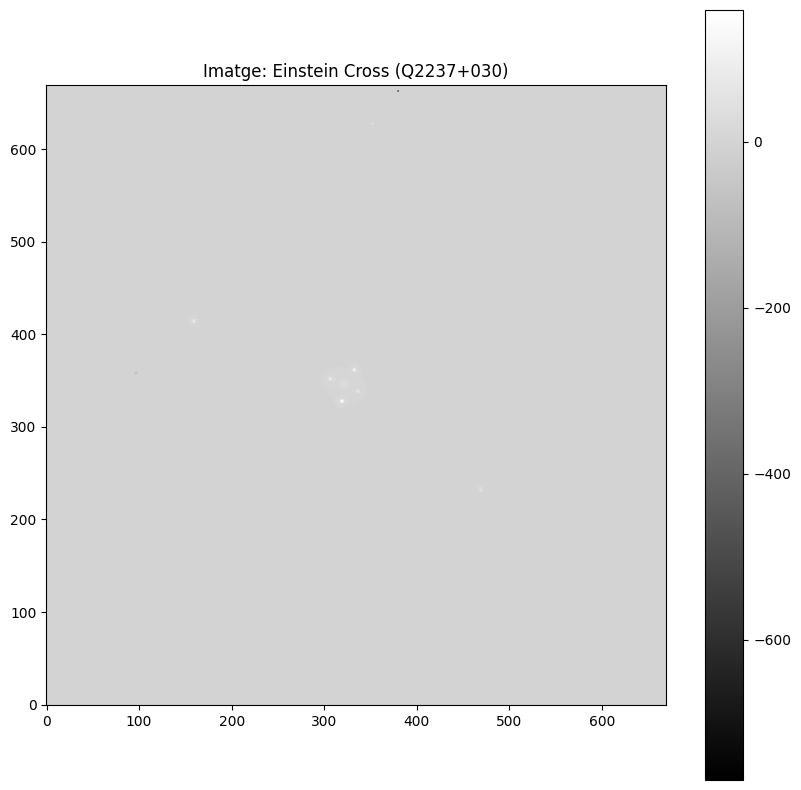

Lluminositat total: 30051.53515625


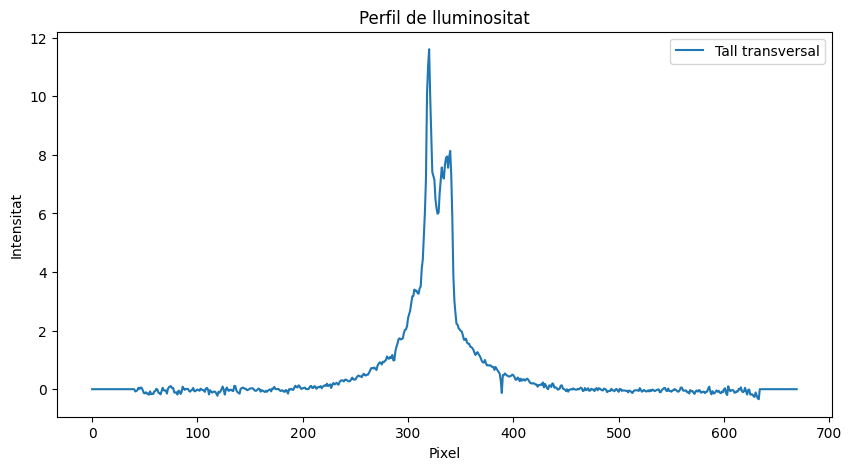

Angle d'Einstein: 2.0182 arcseconds


In [ ]:

# Instal·lació de biblioteques necessàries
!pip install astropy matplotlib

# Importació de biblioteques
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.constants import G, c

# Carregar el fitxer FITS (puja'l manualment)
from google.colab import files
uploaded = files.upload()

# Nom del fitxer FITS (substitueix pel nom del fitxer pujat)
file_name = list(uploaded.keys())[0]

# Obre el fitxer FITS
fits_data = fits.open(file_name)

# Mostra informació del FITS
fits_data.info()

# Extreu dades de la imatge de l'extensió SCI
image_data = fits_data['SCI'].data.astype(np.float32)
fits_data.close()

# Mostra la imatge de la lent gravitacional
plt.figure(figsize=(10, 10))
plt.imshow(image_data, cmap='gray', origin='lower')
plt.colorbar()
plt.title("Imatge: Einstein Cross (Q2237+030)")
plt.show()

# Calcula la lluminositat total
total_luminosity = np.sum(image_data)
print(f"Lluminositat total: {total_luminosity}")

# Mostra un tall transversal de lluminositat
plt.figure(figsize=(10, 5))
plt.plot(image_data[image_data.shape[0] // 2, :], label="Tall transversal")
plt.title("Perfil de lluminositat")
plt.xlabel("Pixel")
plt.ylabel("Intensitat")
plt.legend()
plt.show()

# --- Anàlisi de l'angle d'Einstein ---

#
# Constants físiques
G = 6.67430e-11  # constant gravitacional en m^3 kg^-1 s^-2
c = 299792458    # velocitat de la llum en m/s
M_sun = 1.989e30 # massa solar en kg
pc_to_m = 3.085677581e16  # 1 parsec en metres

# Dades d'exemple (substitueix amb dades reals si cal)
mass = 1e12  # Massa de la galàxia central (en masses solars)
D_L = 1e9   # Distància a la galàxia (en parsecs)
D_S = 2e9    # Distància a la font (en parsecs)

# Converteix les unitats a metres
mass_kg = mass * M_sun
D_L_m = D_L * pc_to_m
D_S_m = D_S * pc_to_m
D_LS_m = D_S_m - D_L_m

# Calcula l'angle d'Einstein en radians
theta_E_rad = np.sqrt((4 * G * mass_kg) / (c**2) * (D_LS_m / (D_L_m * D_S_m)))

# Converteix l'angle a arcsegons
theta_E_arcsec = np.degrees(theta_E_rad) * 3600

print(f"Angle d'Einstein: {theta_E_arcsec:.4f} arcseconds")